# **Internship on Data Science and Analytics**

#**Credit Score Classification Model Development**

####**Import Packages and Modules**

In [3]:
import pandas as pd
import numpy as np

#  Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#  Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

 # Model Accuracy
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score,confusion_matrix, classification_report

# Remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

###**Load Dataset**

In [4]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
data=pd.read_csv("/content/credit.csv")
data.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,11.27,4.0,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.0,11.27,4.0,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,7.0,1.0,7.42,2.0,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


In [6]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
#Dimensions of the dataset

data.shape

(100000, 28)

In [8]:
# To get the basic info like list of features ,non null count ,datatype of the features

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [9]:
# Check for duplicate values

data.duplicated().sum()

0

In [10]:
# Check for the unique number of values in each column

for i in data.columns:
  print(i,data[i].nunique(),'\n')

ID 100000 

Customer_ID 12500 

Month 8 

Name 10128 

Age 43 

SSN 12500 

Occupation 15 

Annual_Income 12488 

Monthly_Inhand_Salary 13241 

Num_Bank_Accounts 12 

Num_Credit_Card 12 

Interest_Rate 34 

Num_of_Loan 10 

Type_of_Loan 6261 

Delay_from_due_date 63 

Num_of_Delayed_Payment 26 

Changed_Credit_Limit 3452 

Num_Credit_Inquiries 18 

Credit_Mix 3 

Outstanding_Debt 12203 

Credit_Utilization_Ratio 100000 

Credit_History_Age 404 

Payment_of_Min_Amount 3 

Total_EMI_per_month 11890 

Amount_invested_monthly 12261 

Payment_Behaviour 6 

Monthly_Balance 98494 

Credit_Score 3 



In [11]:
# Check for customers with duplicate names

duplicate_names = data.groupby('Name')['Customer_ID'].nunique()
duplicates = duplicate_names[duplicate_names > 1]
duplicates.head(7)

Name
A.b                2
A.j                2
Aaron Pressmanb    2
Abboudq            2
Adamg              3
Adegokej           3
Adlerk             2
Name: Customer_ID, dtype: int64

In [12]:
data[data['Name']=='yv'].head(10)

# Anjuli Daviesh, Gernot Hellerl , Peterl, Krudyh

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
11672,23142,46344,1,yv,25.0,106551522.0,Entrepreneur,16819.980,1680.665000,6.0,7.0,33.0,5.0,"Auto Loan, Student Loan, Mortgage Loan, Studen...",30.0,21.0,1.07,11.0,Bad,3048.28,37.340032,59.0,Yes,37.670522,18.363839,Low_spent_Small_value_payments,236.738595,Poor
11673,23143,46344,2,yv,25.0,106551522.0,Entrepreneur,16819.980,1680.665000,6.0,7.0,33.0,5.0,"Auto Loan, Student Loan, Mortgage Loan, Studen...",30.0,18.0,1.07,11.0,Bad,3048.28,25.600281,60.0,Yes,37.670522,18.363839,High_spent_Medium_value_payments,357.522701,Poor
11674,23144,46344,3,yv,25.0,106551522.0,Entrepreneur,16819.980,1680.665000,6.0,7.0,33.0,5.0,"Auto Loan, Student Loan, Mortgage Loan, Studen...",35.0,15.0,1.07,11.0,Bad,3048.28,28.304979,61.0,Yes,37.670522,18.363839,High_spent_Medium_value_payments,327.561642,Poor
11675,23145,46344,4,yv,25.0,106551522.0,Entrepreneur,16819.980,1680.665000,6.0,7.0,33.0,5.0,"Auto Loan, Student Loan, Mortgage Loan, Studen...",31.0,18.0,1.07,11.0,Bad,3048.28,31.400935,62.0,Yes,37.670522,18.363839,High_spent_Medium_value_payments,347.244802,Poor
11676,23146,46344,5,yv,25.0,106551522.0,Entrepreneur,16819.980,1680.665000,6.0,7.0,33.0,5.0,"Auto Loan, Student Loan, Mortgage Loan, Studen...",30.0,18.0,1.07,11.0,Bad,3048.28,22.730806,63.0,Yes,37.670522,18.363839,High_spent_Small_value_payments,326.526101,Standard
11677,23147,46344,6,yv,25.0,106551522.0,Entrepreneur,16819.980,1680.665000,6.0,7.0,33.0,5.0,"Auto Loan, Student Loan, Mortgage Loan, Studen...",30.0,18.0,1.07,11.0,Bad,3048.28,32.383744,64.0,NM,37.670522,18.363839,Low_spent_Large_value_payments,302.612401,Poor
11678,23148,46344,7,yv,26.0,106551522.0,Entrepreneur,16819.980,1680.665000,6.0,7.0,33.0,5.0,"Auto Loan, Student Loan, Mortgage Loan, Studen...",30.0,18.0,1.07,11.0,Bad,3048.28,40.101783,65.0,Yes,37.670522,18.363839,Low_spent_Small_value_payments,302.642174,Poor
11679,23149,46344,8,yv,26.0,106551522.0,Entrepreneur,16819.980,1680.665000,6.0,7.0,33.0,5.0,"Auto Loan, Student Loan, Mortgage Loan, Studen...",32.0,20.0,1.07,11.0,Bad,3048.28,36.081854,66.0,Yes,37.670522,18.363839,High_spent_Medium_value_payments,332.889657,Poor
88712,138702,2854,1,yv,42.0,644238314.0,Engineer,8898.785,973.565417,9.0,5.0,30.0,8.0,"Student Loan, Personal Loan, Personal Loan, Pa...",29.0,17.0,9.36,10.0,Bad,1292.14,35.562035,99.0,Yes,54.340084,18.611299,Low_spent_Large_value_payments,232.418734,Poor
88713,138703,2854,2,yv,42.0,644238314.0,Engineer,8898.785,973.565417,9.0,5.0,30.0,8.0,"Student Loan, Personal Loan, Personal Loan, Pa...",24.0,16.0,9.36,10.0,Bad,1292.14,33.115870,100.0,Yes,54.340084,18.611299,Low_spent_Medium_value_payments,288.791582,Standard


**From the above lines of code its clear that:**

**1. The dataset includes 12,500 unique customers tracked over 8 months, but only 10,128 unique names, suggesting that some customers with different IDs share the same name.**

**2. Additionally, each Social Security Number (SSN) uniquely identifies a customer in the dataset.**










In [13]:
#To get basic statical summary of the numerical columns of the dataset.

data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


**There are 21 numeric columns in the datset and their basic statistical summary is shown in the above output.**

In [14]:
# To get basic summary of the categorical columns in the datset.

data.describe(include='object')

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Jessicad,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28616,53174


**There are 7 character type features in the dataset and their count ,unique number of observations, the most ferquently occuring value and its corresponding count is listed as 'top' and 'freq' respectively.**

**Categorical Feature Analysis**

In [15]:
# Value counts of the column - Credit_Mix

data['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [16]:
### Value counts of the column - Payment_of_Min_Amount

data['Payment_of_Min_Amount'].value_counts(dropna = False)

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [17]:
# Value counts of the column - Occupation

data['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

In [18]:
# Value counts of the column - Payment_Behaviour

data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64

#**Exploratory Data Analysis (EDA)**

####**Count Plot for different Categorical Features**

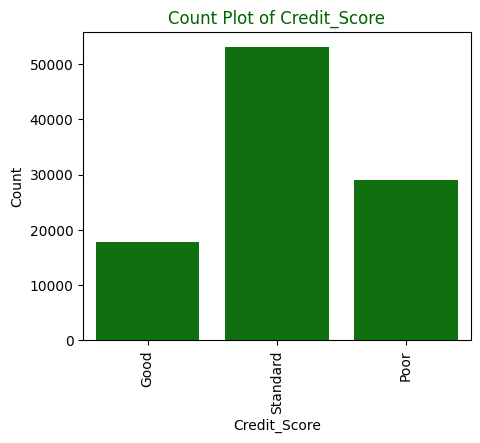

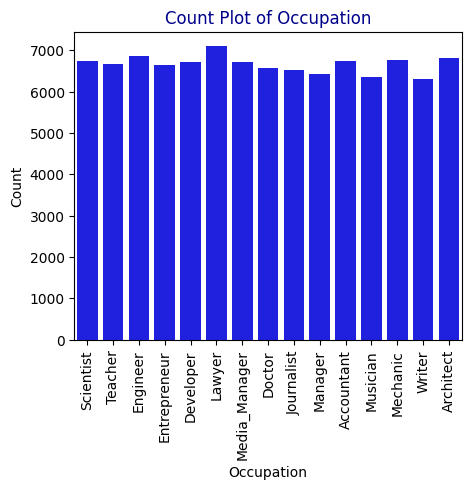

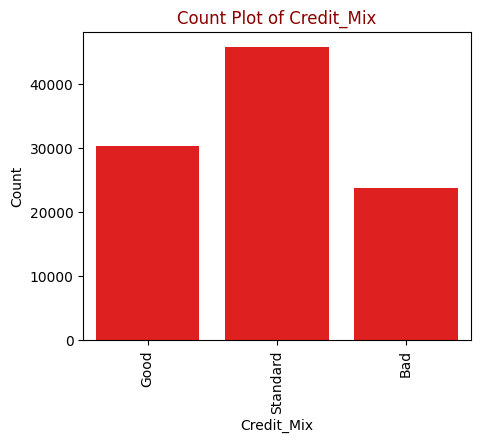

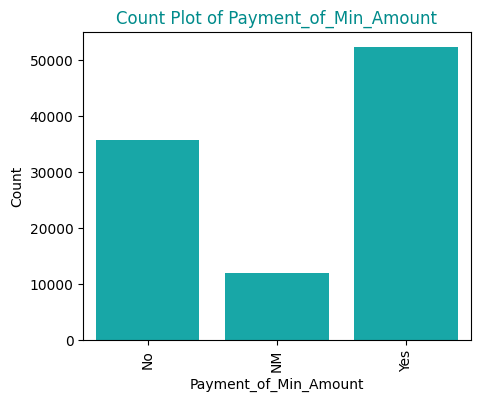

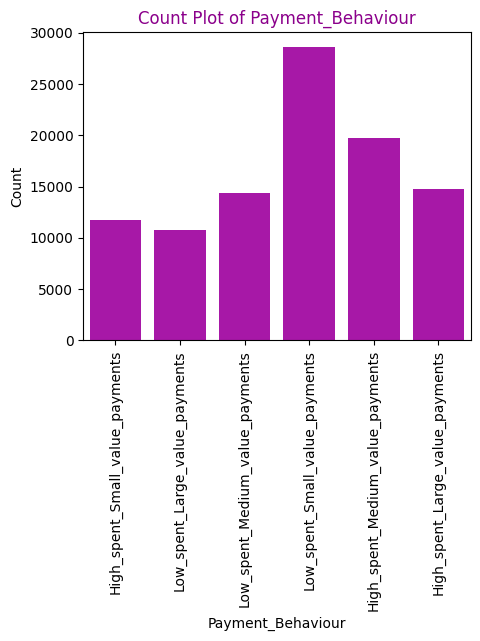

In [19]:

# count plot for 5 categorical features

def count_plot(column_name, color, title_color):
    plt.figure(figsize=(5, 4))
    sns.countplot(x=column_name, data=data, color=color)
    plt.title(f'Count Plot of {column_name}', color=title_color)
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=90)   # Rotate x-axis labels for better readability
    plt.show()


count_plot('Credit_Score', 'g', 'darkgreen')
count_plot('Occupation', 'b', 'darkblue')
count_plot('Credit_Mix', 'r', 'darkred')
count_plot('Payment_of_Min_Amount', 'c', 'darkcyan')
count_plot('Payment_Behaviour', 'm', 'darkmagenta')

####**Heatmap**

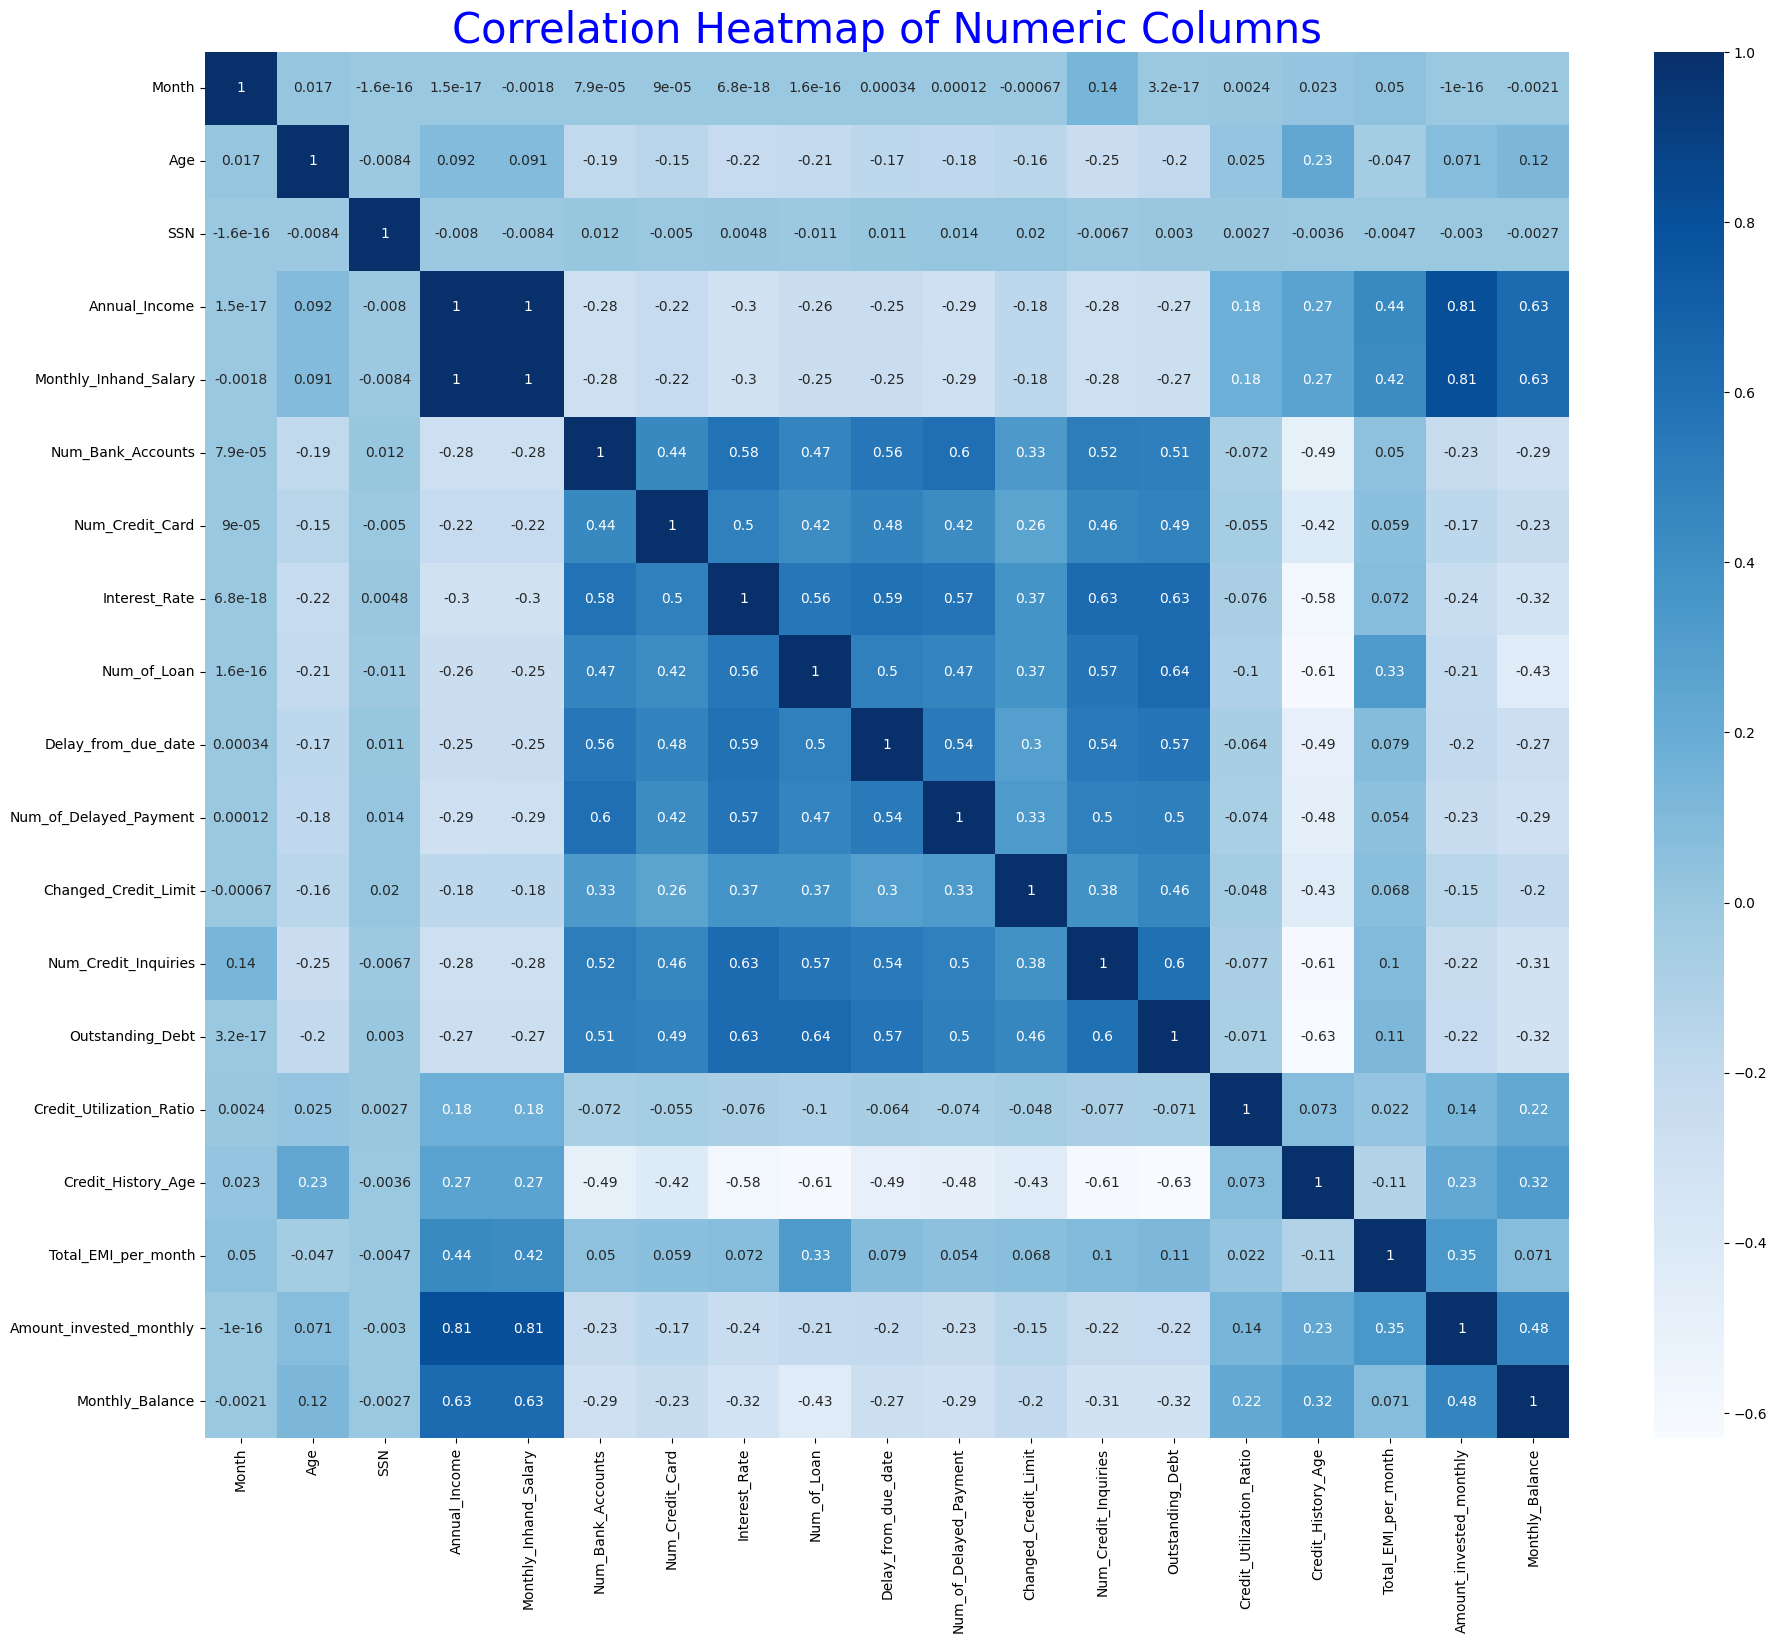

In [20]:

num_columns = data.select_dtypes(include=['number']).drop(['ID', 'Customer_ID'], axis=1).columns

plt.figure(figsize=(22,18))
sns.heatmap(data[num_columns].corr(),annot=True,cmap='Blues')
plt.title('Correlation Heatmap of Numeric Columns',color='blue',fontsize=30);


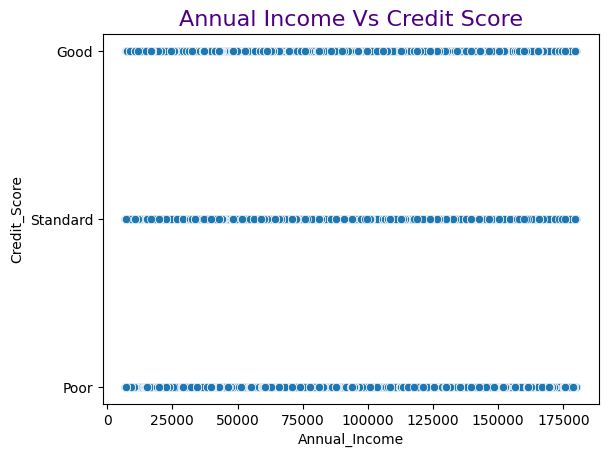

In [21]:
sns.scatterplot(x='Annual_Income', y='Credit_Score', data=data)
plt.title("Annual Income Vs Credit Score",fontsize=16,color='indigo')
plt.show()


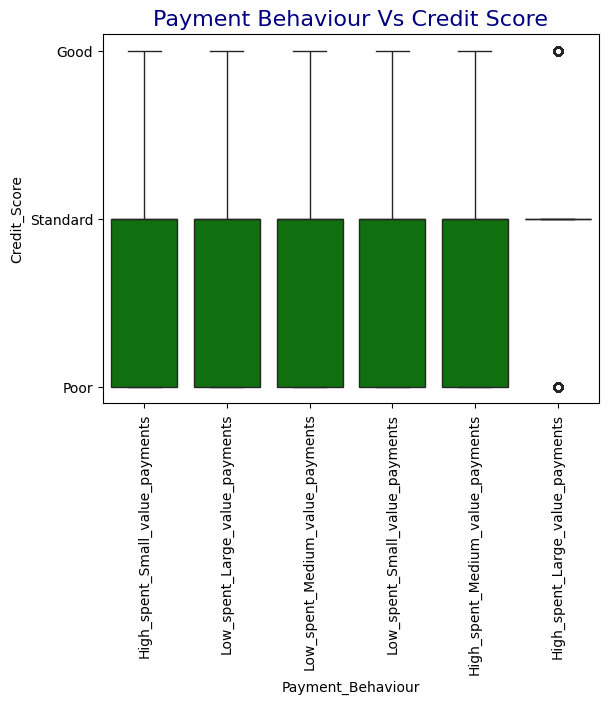

In [22]:
sns.boxplot(x='Payment_Behaviour', y='Credit_Score', data=data,color='g')
plt.xticks(rotation=90)
plt.title("Payment Behaviour Vs Credit Score",fontsize=16,color='navy')
plt.show()


####**Lineplot**

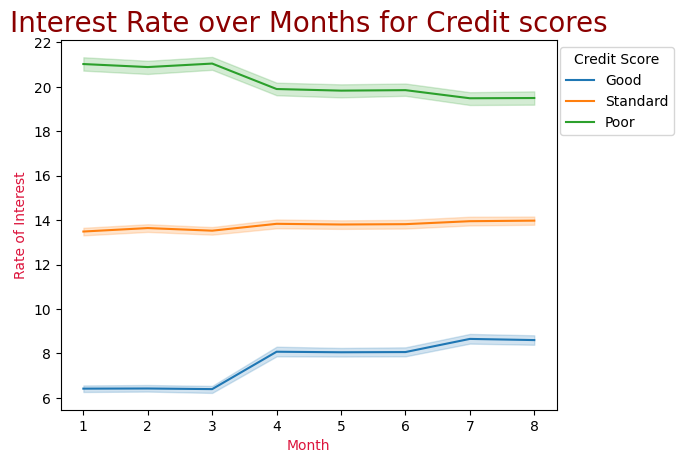

In [23]:
sns.lineplot(x='Month',y='Interest_Rate',hue='Credit_Score',data=data,palette='tab10')

plt.legend(loc='upper right',title='Credit Score',bbox_to_anchor=(1.25,1))
plt.title('Interest Rate over Months for Credit scores',color='darkred',fontsize=20)
plt.xlabel("Month",color='crimson')
plt.ylabel("Rate of Interest",color='crimson');

####**KDE Plot**

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

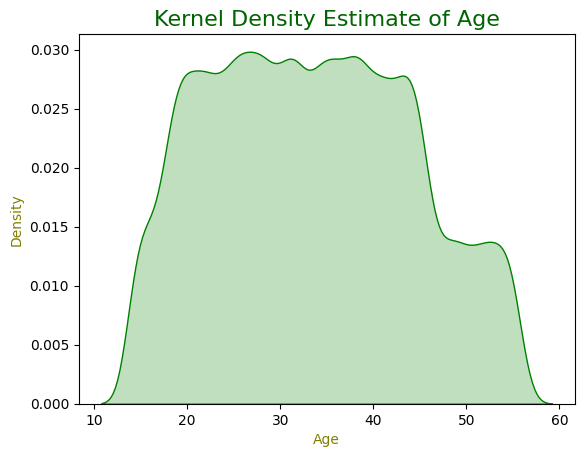

In [24]:
sns.kdeplot(data['Age'],color='g',fill=True)
plt.title('Kernel Density Estimate of Age', fontsize=16, color='darkgreen')
plt.xlabel('Age',color='olive')
plt.ylabel('Density',color='olive');

####**Bar Plot**

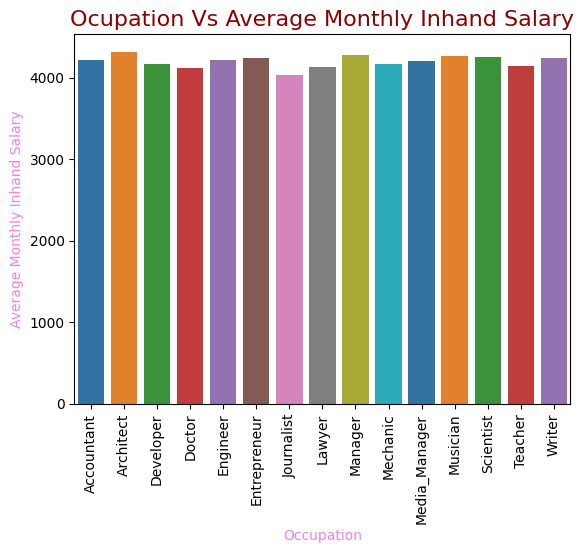

In [25]:
avg_salary = data.groupby('Occupation')['Monthly_Inhand_Salary'].mean().reset_index()


# plt.figure(figsize=(12, 8))
sns.barplot(x='Occupation', y='Monthly_Inhand_Salary', hue='Occupation',data=avg_salary, palette='tab10')

plt.title("Ocupation Vs Average Monthly Inhand Salary",fontsize=16,color='darkred')
plt.xlabel("Occupation",color='violet')
plt.ylabel("Average Monthly Inhand Salary",color='violet')
plt.xticks(rotation=90);

####**RegPlot**

Regplot is used for creating scatter plots with regression lines fit to the data. This makes it a powerful tool for visualizing the relationship between two variables and examining if there is a linear relationship between them.

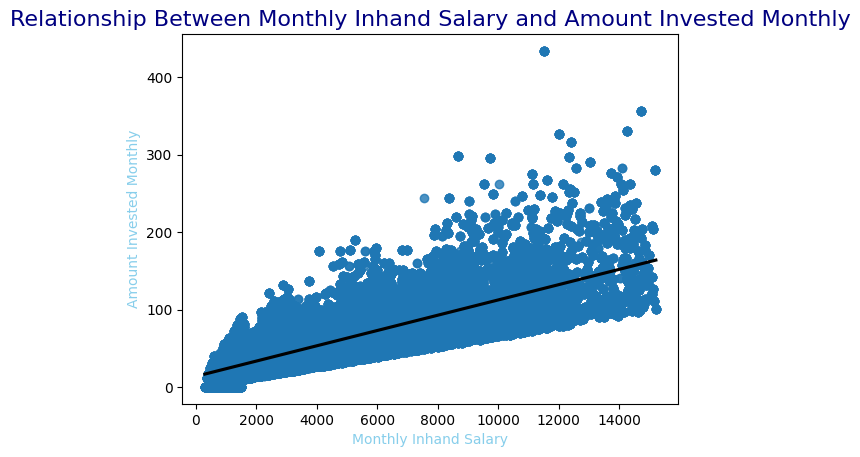

In [26]:
sns.regplot(data=data,x='Monthly_Inhand_Salary',y='Amount_invested_monthly', line_kws=dict(color="black"))

plt.title("Relationship Between Monthly Inhand Salary and Amount Invested Monthly",fontsize=16,color='navy')
plt.xlabel("Monthly Inhand Salary",color='skyblue')
plt.ylabel("Amount Invested Monthly",color='skyblue');

####**Pie Chart**

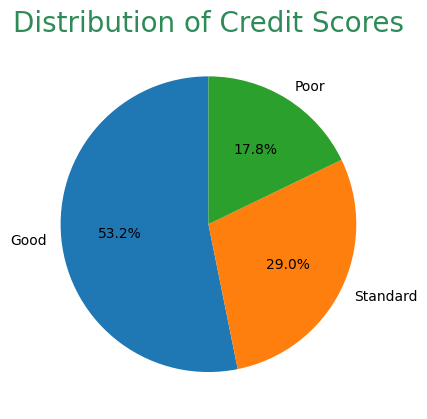

In [27]:

plt.pie(data['Credit_Score'].value_counts(), labels=data['Credit_Score'].unique(), autopct='%2.1f%%', startangle=90)
plt.title('Distribution of Credit Scores',color='seagreen',fontsize=20)
plt.show()


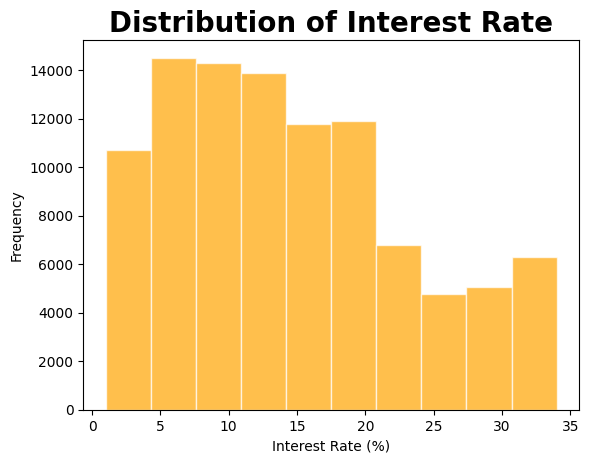

In [28]:
plt.hist(data['Interest_Rate'], color='orange',edgecolor='white', alpha=0.7)
plt.title('Distribution of Interest Rate',fontsize=20,fontweight='bold')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

#**Preprocessing of the Data**

Data preprocessing is the process of getting our dataset ready for model training.The following are the preprocessing steps:

1. Handling missing values
2. Detect and remove outliers in numerical variables
3. Feature encoding
4. Data trasformation
5. Feature engineering

####**Remove Unnecessary Features**

In [29]:
data.drop(['ID','Customer_ID','Name','SSN'],axis=1,inplace=True)

**Why we are dropping these features**

1. Features like 'ID' or 'Customer_ID' often contain unique identifiers for
each in the dataset, Names are unique to individual and SSN (Social Security Numbers) are unique identifiers. These identifiers do not contribute to the analysis or modeling process .

2. Removing unnecessary columns helps reduce the dimensionality of the dataset.





In [30]:
data.shape
# Now the features get reduced to 24

(100000, 24)

##**Check for missing values**

In [31]:
data.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

**There is no missing values in the dataset.**

##**Outliers**

An Outlier is a data point in a dataset that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

**To Identify Outliers**

1. IQR Method: Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile.

2. Z-Score Method: Data points that falls outside of 3 standard deviations. We can use a z-score and if the z-score falls outside of 2 standard deviations

**Various ways of finding the outliers**

1. Scatter plot
2. Boxplot
3. Using IQR Method
4. Using Z-Score Method

##**Boxplot**

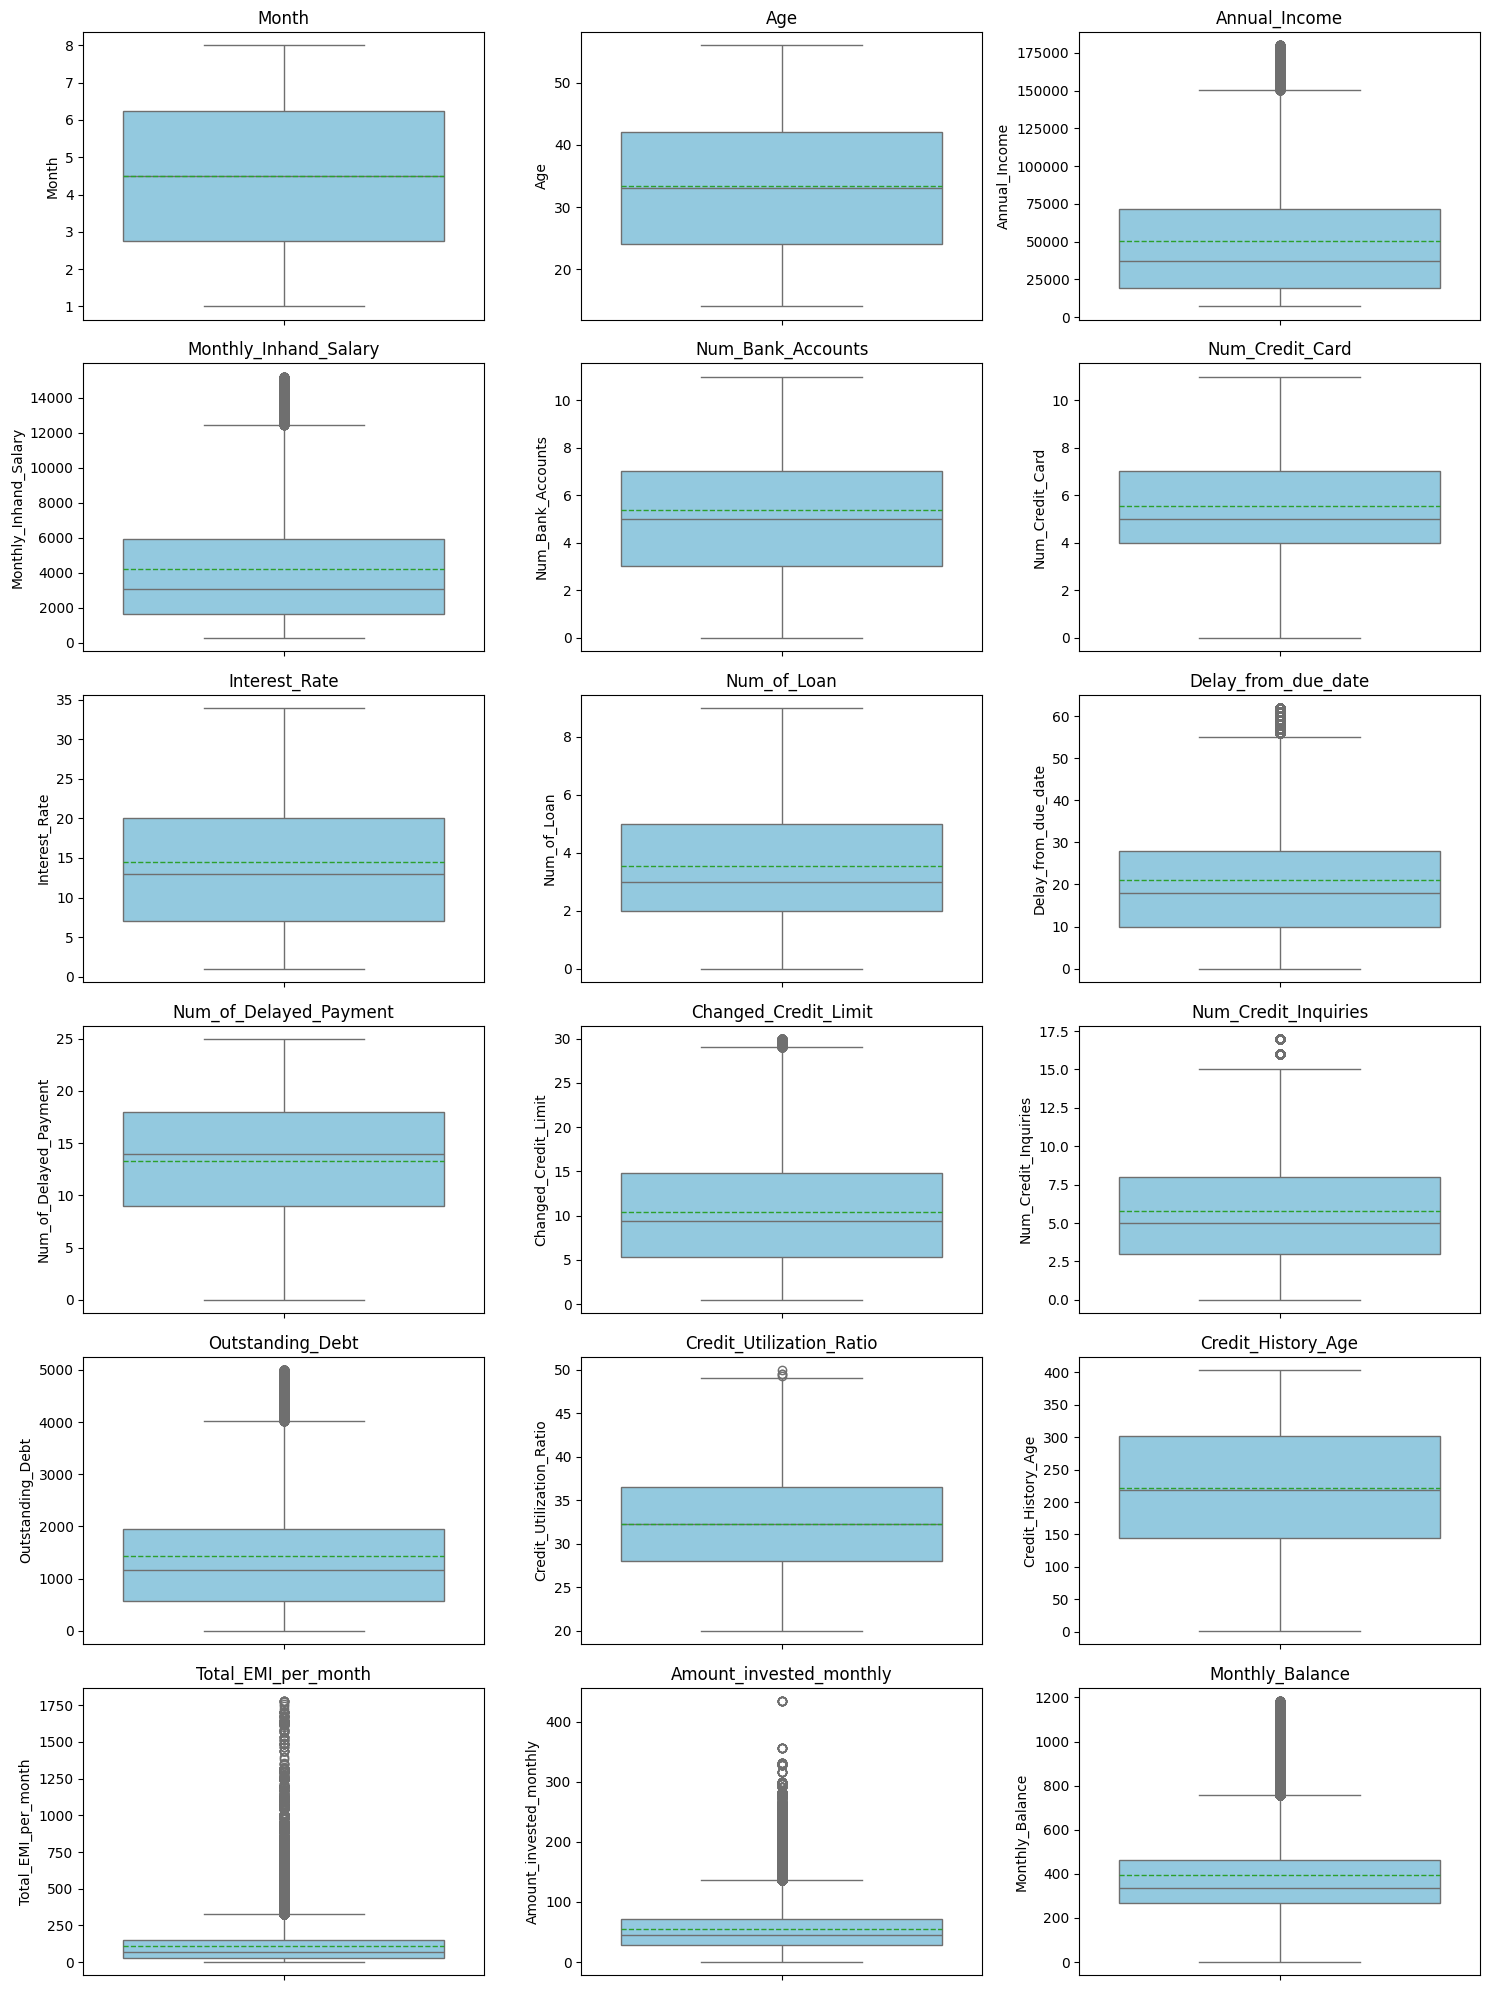

In [32]:
num_columns = data.select_dtypes(include=['number']).columns
num_columns

plt.figure(figsize=(15, 20))


for i, col in enumerate(num_columns):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(y=data[col],color='skyblue', patch_artist=True,showmeans=True,meanline=True) # Red line in the figure shows mean and green line shows the median
    plt.title(col)

plt.tight_layout()
plt.show()


###**Create a copy of the original datset to perform operations**

In [33]:
data1=data.copy()
data1.shape

(100000, 24)

###**Check for Outliers**

In [34]:
# creating a table to display the quantiles, IQR, outliers, etc.

# Create a dictionary to store the results
results = {
    'Column': [],'Q3': [],'Q1': [],'IQR': [],'Upper': [],'Lower': [],'Outliers': [],'Number of Outliers': [] }


# Create a for loop for all numerical columns
for i in num_columns:
  Q1 = np.percentile(data1[i],25,method='midpoint')
  Q3 = np.percentile(data1[i],75,method='midpoint')
  IQR =Q3 - Q1

  upper = Q3 + 1.5 * IQR
  lower = Q1 - 1.5 * IQR

  outliers = [x for x in data1[i] if x > upper or x < lower]

  # Append the results to the dictionary
  results['Column'].append(i)
  results['Q3'].append(Q3)
  results['Q1'].append(Q1)
  results['IQR'].append(IQR)
  results['Upper'].append(upper )
  results['Lower'].append(lower)
  results['Outliers'].append(outliers)
  results['Number of Outliers'].append(len(outliers))

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

pd.set_option('display.float_format', lambda x: '%.2f' % x)     # Display float values with 2 decimal places,
                                                                # otherwise it will show with scientific notation 'e'

# Display the DataFrame
results_df




,Column,Q3,Q1,IQR,Upper,Lower,Outliers,Number of Outliers
0,Month,6.50,2.50,4.00,12.50,-3.50,[],0
1,Age,42.00,24.00,18.00,69.00,-3.00,[],0
2,Annual_Income,71685.54,19341.68,52343.86,150201.34,-59174.12,"[173196.32, 173196.32, 173196.32, 173196.32, 1...",2000
3,Monthly_Inhand_Salary,5957.72,1626.59,4331.12,12454.40,-4870.09,"[14258.026666666668, 14258.026666666668, 14258...",2017
4,Num_Bank_Accounts,7.00,3.00,4.00,13.00,-3.00,[],0
5,Num_Credit_Card,7.00,4.00,3.00,11.50,-0.50,[],0
6,Interest_Rate,20.00,7.00,13.00,39.50,-12.50,[],0
7,Num_of_Loan,5.00,2.00,3.00,9.50,-2.50,[],0
8,Delay_from_due_date,28.00,10.00,18.00,55.00,-17.00,"[61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61....",4002
9,Num_of_Delayed_Payment,18.00,9.00,9.00,31.50,-4.50,[],0


From the table it is clear that out of 19 numeric columns, 10 features have outliers. So now check for skewness:
1. if skewed : Use IQR method
2. if normal : Use Z-Score Method

###**Check the skewness of the features**

In [35]:
for i in num_columns:
  print('\033[36m'+ i +'\033[0m' )
  print(data[i].skew(),'\n')

Month
0.0 

Age
0.15633755099160856 

Annual_Income
1.130222566741384 

Monthly_Inhand_Salary
1.1286896104040092 

Num_Bank_Accounts
-0.19001504208866618 

Num_Credit_Card
0.22580768382470084 

Interest_Rate
0.4962318996645298 

Num_of_Loan
0.44560852324073413 

Delay_from_due_date
0.9698402706723249 

Num_of_Delayed_Payment
-0.21447039342856647 

Changed_Credit_Limit
0.7083424268261724 

Num_Credit_Inquiries
0.40682536214725384 

Outstanding_Debt
1.2075361955699684 

Credit_Utilization_Ratio
0.02861652613497035 

Credit_History_Age
-0.04883166412470526 

Total_EMI_per_month
4.041492244076896 

Amount_invested_monthly
1.7610362306626115 

Monthly_Balance
1.3556137797479813 



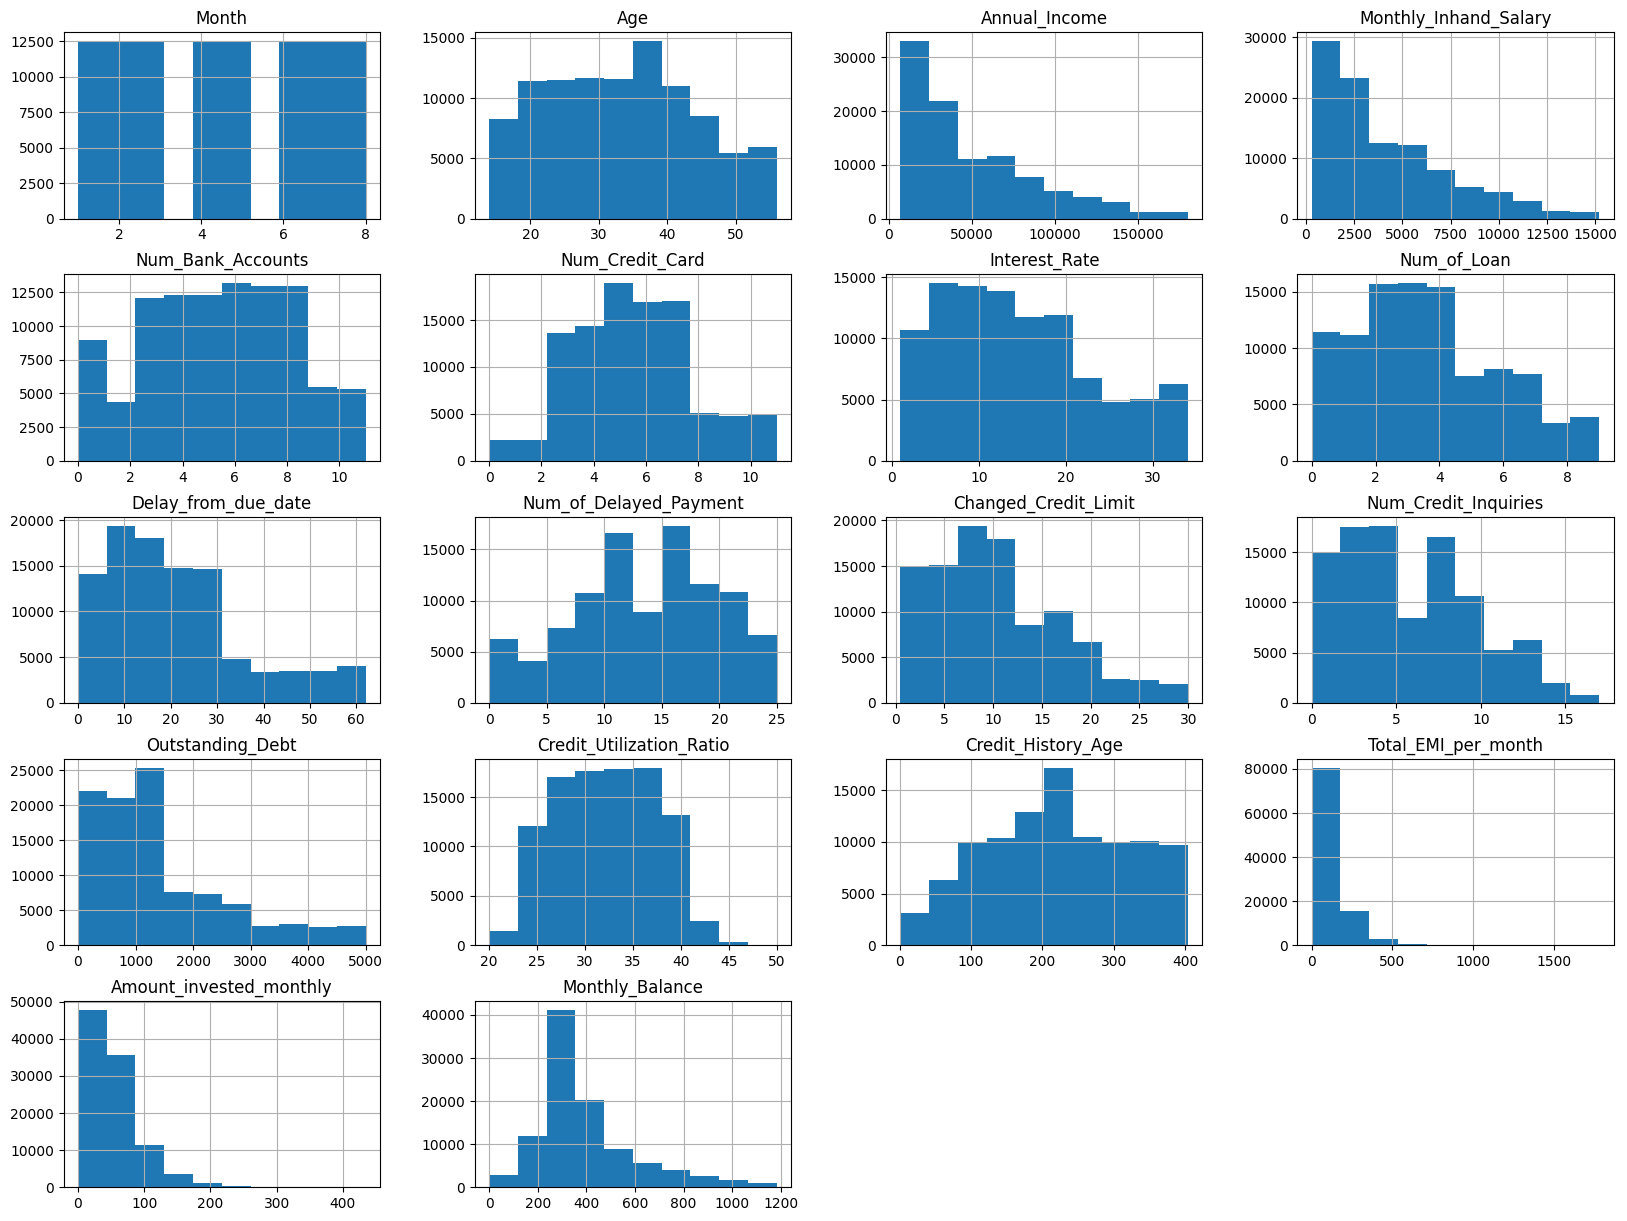

In [36]:
# to check the skewness

freq=data.select_dtypes(include=('float64','int64'))
freq.hist(figsize=(20,15));


Here, features are skewed so we can use IQR Method to handle outliers.

In [37]:
# HANDLING OUTLIERS WITH CLIP FUNCTION

for i in num_columns:

  #Calculating the interquartile range
  Q1 = np.percentile(data1[i],25,method='midpoint')
  Q3 = np.percentile(data1[i],75,method='midpoint')
  IQR =Q3 - Q1

  #Finding the lower limit and upper limit
  low_lim = Q1 - 1.5*IQR
  up_lim = Q3 +1.5*IQR

  #Finding outliers
  outliers =[]
  for x in data1[i]:
    if((x < low_lim) or (x > up_lim)):
      outliers.append(x)

# upper values and lower values are replaced by upper limit and lower limit (respectively)by using clip function
  data1[i] = data1[i].clip(lower=low_lim ,upper=up_lim)

###**Check if the outliers are handled properly**

In [38]:
# Create a dictionary to store the results
results = {
    'Column': [],'Outliers': [],'Number of Outliers': [] }


# Create a for loop for all numerical columns
for i in num_columns:

  Q1 = np.percentile(data1[i],25,method='midpoint')
  Q3 = np.percentile(data1[i],75,method='midpoint')
  IQR = Q3 - Q1

  upper = Q3 + 1.5 * IQR
  lower = Q1 - 1.5 * IQR

  outliers = [x for x in data1[i] if x > upper or x < lower]

  # Append the results to the dictionary
  results['Column'].append(i)
  results['Outliers'].append(outliers)
  results['Number of Outliers'].append(len(outliers))

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


,Column,Outliers,Number of Outliers
0,Month,[],0
1,Age,[],0
2,Annual_Income,[],0
3,Monthly_Inhand_Salary,[],0
4,Num_Bank_Accounts,[],0
5,Num_Credit_Card,[],0
6,Interest_Rate,[],0
7,Num_of_Loan,[],0
8,Delay_from_due_date,[],0
9,Num_of_Delayed_Payment,[],0


In [39]:
data1.shape

(100000, 24)

**Here, I created a copy of original data and handled the outliers and now I am going to created another copy and do further preprocessing for both the datsets.**

In [40]:
dt = data.copy()
dt.shape

(100000, 24)

##**Encoding**

Encoding refers to the process of transforming categorical data into a numerical format that machine learning algorithms can process effectively.

Common Encoding Methods are:
1. One Hot Encoding
2. Label Encoding

In [41]:
data['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [42]:
data['Occupation'].nunique()

15

In [43]:
data['Type_of_Loan'].nunique()

6261

In [44]:
data['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [45]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64

**One Hot Encoding**

In [46]:
# One Hot Encoding for data1 (data in which outliers are handled)

ohe_ch_cols=['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']

# these columns contain small number of unique values ..so One hot encoding is preffered

data1 = pd.get_dummies(data1, columns=ohe_ch_cols,dtype=int)


In [47]:
# One Hot Encoding for  dt (data with outliers ie, outliers are not handled)

dt = pd.get_dummies(dt, columns=ohe_ch_cols,dtype=int)

**Label Encoding**

In [48]:
#Label Encoding for the target variable

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data1['Credit_Score']=le.fit_transform(data1['Credit_Score'])



In [49]:
dt['Credit_Score']=le.fit_transform(dt['Credit_Score'])

**Frequency Encoding**

In [50]:
frequency_encoding = dt['Type_of_Loan'].value_counts().to_dict()
dt['Type_of_Loan'] = dt['Type_of_Loan'].map(frequency_encoding)


In [51]:
frequency_encoding = data1['Type_of_Loan'].value_counts().to_dict()
data1['Type_of_Loan'] = data1['Type_of_Loan'].map(frequency_encoding)

In [52]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data1.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.00,19114.12,1824.84,3.00,4.00,3.00,4.00,8,3.00,7.00,11.27,4.00,809.98,26.82,265.00,49.57,21.47,312.49,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,2,23.00,19114.12,1824.84,3.00,4.00,3.00,4.00,8,3.00,4.00,11.27,4.00,809.98,31.94,266.00,49.57,21.47,284.63,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,3,23.00,19114.12,1824.84,3.00,4.00,3.00,4.00,8,3.00,7.00,11.27,4.00,809.98,28.61,267.00,49.57,21.47,331.21,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,4,23.00,19114.12,1824.84,3.00,4.00,3.00,4.00,8,5.00,4.00,6.27,4.00,809.98,31.38,268.00,49.57,21.47,223.45,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,5,23.00,19114.12,1824.84,3.00,4.00,3.00,4.00,8,6.00,4.00,11.27,4.00,809.98,24.80,269.00,49.57,21.47,341.49,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [53]:
dt.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.00,19114.12,1824.84,3.00,4.00,3.00,4.00,8,3.00,7.00,11.27,4.00,809.98,26.82,265.00,49.57,21.47,312.49,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,2,23.00,19114.12,1824.84,3.00,4.00,3.00,4.00,8,3.00,4.00,11.27,4.00,809.98,31.94,266.00,49.57,21.47,284.63,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,3,23.00,19114.12,1824.84,3.00,4.00,3.00,4.00,8,3.00,7.00,11.27,4.00,809.98,28.61,267.00,49.57,21.47,331.21,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,4,23.00,19114.12,1824.84,3.00,4.00,3.00,4.00,8,5.00,4.00,6.27,4.00,809.98,31.38,268.00,49.57,21.47,223.45,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,5,23.00,19114.12,1824.84,3.00,4.00,3.00,4.00,8,6.00,4.00,11.27,4.00,809.98,24.80,269.00,49.57,21.47,341.49,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0


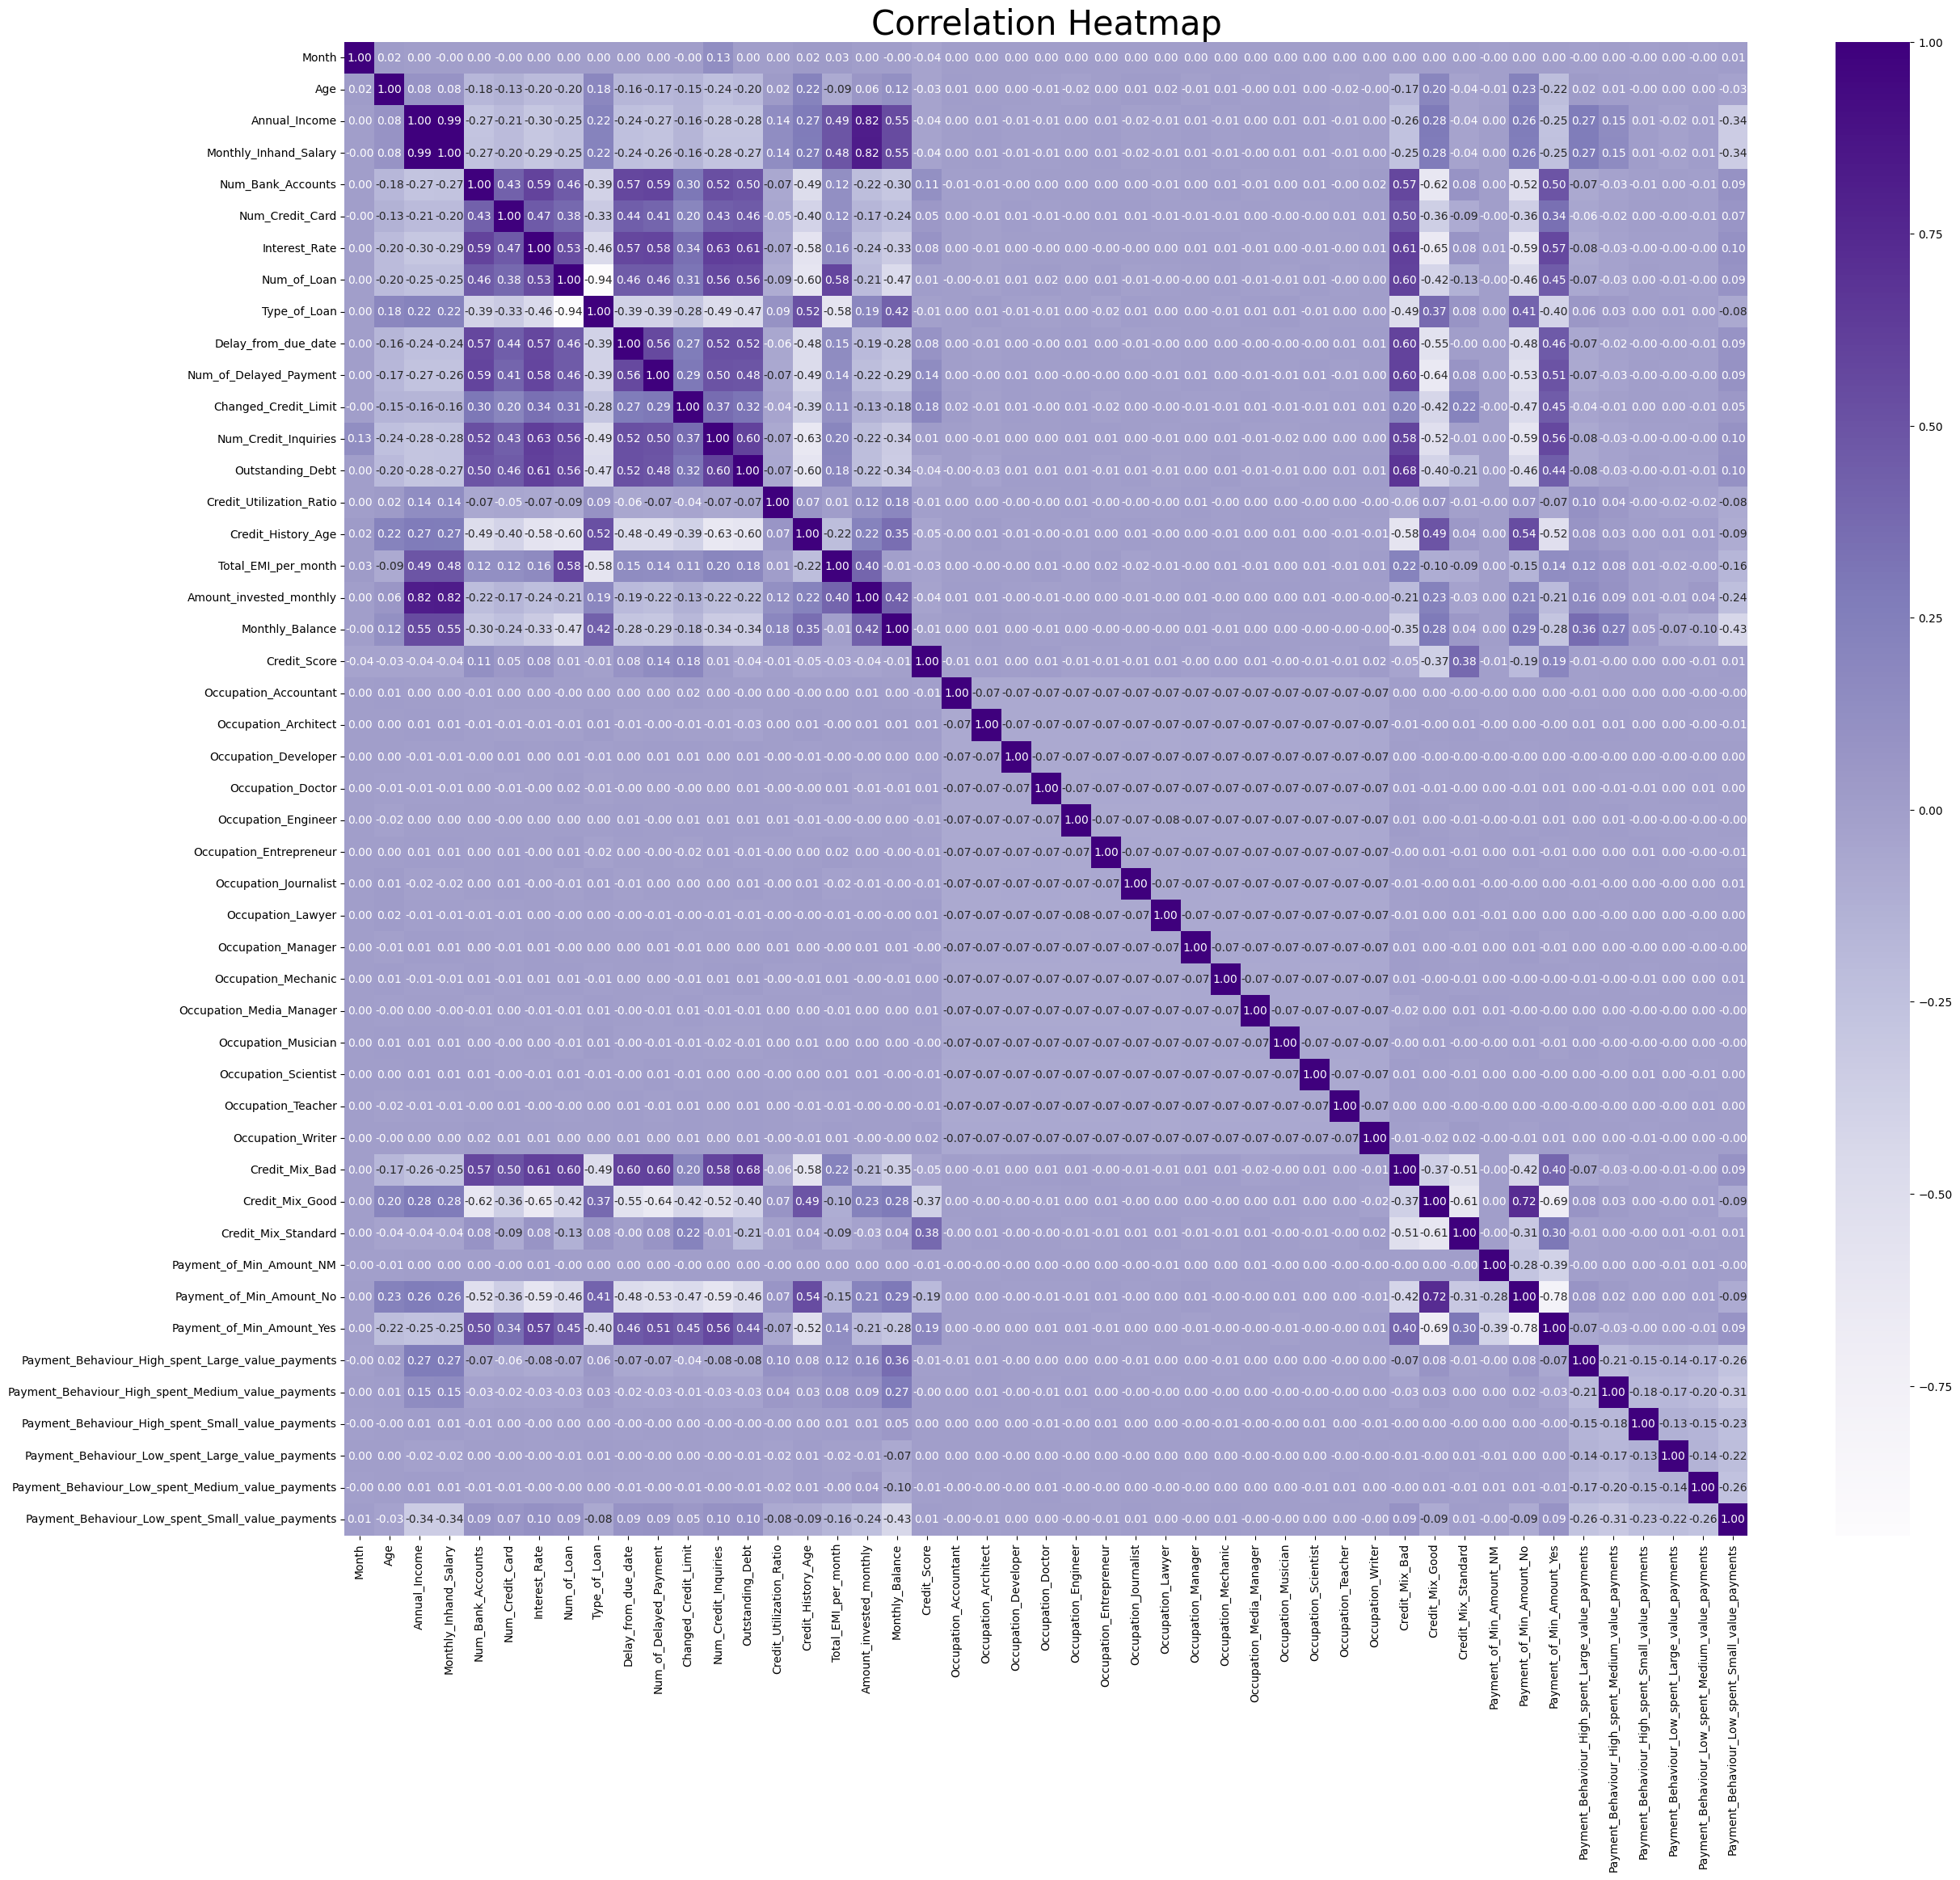

In [54]:
plt.figure(figsize=(28,24))
sns.heatmap(dt.corr(method='spearman'),
           annot=True,cmap='Purples',fmt='.2f')
plt.title('Correlation Heatmap',fontsize=30);

In [55]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int64  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  float64
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  float64
 8   Type_of_Loan                                        100000 non-nu

In [56]:
# correlation = dt['Annual_Income'].corr(dt['Monthly_Inhand_Salary'])
# correlation

#**Data Split**

In [57]:

# Split data into independent features (X) and target (y)
X = dt.drop('Credit_Score',axis=1)
y =dt['Credit_Score']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [58]:
# Print the sizes of each set

print(f"Training set: {len(X_train)}")
print(f"Testing set: {len(X_test)}")

Training set: 75000
Testing set: 25000



##**Scaling**

In [59]:

sc=StandardScaler()

# Now the preprocessed independent features 'X' is scaled and named as X_sc.

scaled=sc.fit_transform(X)
X_sc=pd.DataFrame(scaled)
X_sc

##**Data Split with scaled data**

In [60]:
# Split data into training and test sets with scaled data

X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y, test_size=0.25, random_state=42)


In [61]:
# Further split training data into training and validation sets

X_trn, X_val, y_trn, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f"Training set: {len(X_train)}")
print(f"Validation set: {len(X_val)}")

Training set: 75000
Validation set: 18750


#                                   **Week 2 - Model Development and Training**


Since Credit Score detection is a classfication problem, we will need to use classfication models.Some of the classifiers include:

1. Logistic regression
2. Support vector classification
3. K-nearest neighbours
4. Decision Tree
5. Random forest
6. Naive Bayes
7. Gradient Boosting


**Logistic Regression**

In [63]:
log_reg=LogisticRegression()

log_reg.fit(X_train,y_train)
log_pred=log_reg.predict(X_test)

print('Accuracy:',accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred,average='weighted'))
print('recall:',recall_score(y_test,log_pred,average='weighted'))
print('F1:',f1_score(y_test,log_pred,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,log_pred))



Accuracy: 0.5456
Precision: 0.5299966926056684
recall: 0.5456
F1: 0.4839097798122896

Confusion Matrix:
 [[  182    83  4157]
 [   25  2403  4885]
 [  184  2026 11055]]


**KNN**

Text(0, 0.5, 'Metric K')

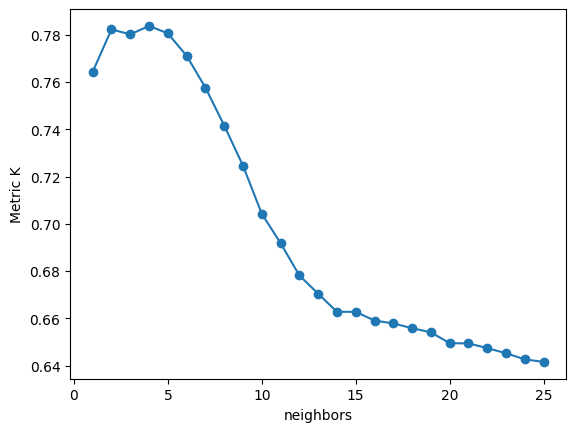

In [64]:

metric_k=[]
neighbors=np.arange(1,26)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  classifier.fit(X_train,y_train)
  knn_pred=classifier.predict(X_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

plt.plot(neighbors,metric_k,'o-')
plt.xlabel('neighbors')
plt.ylabel('Metric K')

In [65]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='euclidean')
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)

print('Accuracy:',accuracy_score(y_test,knn_pred))
print('Precision:',precision_score(y_test,knn_pred,average='weighted'))
print('recall:',recall_score(y_test,knn_pred,average='weighted'))
print('F1:',f1_score(y_test,knn_pred,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,knn_pred))

Accuracy: 0.78376
Precision: 0.7957088292185913
recall: 0.78376
F1: 0.7837828181322939

Confusion Matrix:
 [[3635   47  740]
 [  58 6427  828]
 [1656 2077 9532]]


**Decision** **Tree**

In [66]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_pred= dt_clf.predict(X_test)

print('Accuracy:',accuracy_score(y_test,dt_pred))
print('Precision:',precision_score(y_test,dt_pred,average='weighted'))
print('recall:',recall_score(y_test,dt_pred,average='weighted'))
print('F1:',f1_score(y_test,dt_pred,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,dt_pred))

Accuracy: 0.74872
Precision: 0.7486206941380602
recall: 0.74872
F1: 0.7486486662327079

Confusion Matrix:
 [[ 3055   181  1186]
 [  139  5327  1847]
 [ 1245  1684 10336]]


**Random** **Forest**

In [67]:
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)

print('Accuracy:',accuracy_score(y_test,rf_pred))
print('Precision:',precision_score(y_test,rf_pred,average='weighted'))
print('recall:',recall_score(y_test,rf_pred,average='weighted'))
print('F1:',f1_score(y_test,rf_pred,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,rf_pred))



Accuracy: 0.8296
Precision: 0.8302673543257688
recall: 0.8296
F1: 0.8296860242563406

Confusion Matrix:
 [[ 3540    19   863]
 [   48  6228  1037]
 [  860  1433 10972]]


**Naive Bayes**

In [68]:

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
nb_pred = naive_bayes_classifier.predict(X_test)

print('Accuracy:',accuracy_score(y_test,nb_pred))
print('Precision:',precision_score(y_test,nb_pred,average='weighted'))
print('recall:',recall_score(y_test,nb_pred,average='weighted'))
print('F1:',f1_score(y_test,nb_pred,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,nb_pred))

Accuracy: 0.60292
Precision: 0.6856859431844272
recall: 0.60292
F1: 0.6031543343347764

Confusion Matrix:
 [[3643  131  648]
 [1227 5393  693]
 [3886 3342 6037]]


**Gradient Boosting**

In [69]:
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(X_train, y_train)
gb_pred = gradient_boosting_classifier.predict(X_test)

print('Accuracy:',accuracy_score(y_test,gb_pred))
print('Precision:',precision_score(y_test,gb_pred,average='weighted'))
print('recall:',recall_score(y_test,gb_pred,average='weighted'))
print('F1:',f1_score(y_test,gb_pred,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,gb_pred))

Accuracy: 0.71496
Precision: 0.7205723249064625
recall: 0.71496
F1: 0.7158565306790665

Confusion Matrix:
 [[3139   59 1224]
 [ 527 4743 2043]
 [1673 1600 9992]]


**SVM**

In [ ]:
sv_clf=SVC()
sv_clf.fit(X_train,y_train)
sv_pred=sv_clf.predict(X_test)

print('Accuracy:',accuracy_score(y_test,sv_pred))
print('Precision:',precision_score(y_test,sv_pred,average='weighted'))
print('recall:',recall_score(y_test,sv_pred,average='weighted'))
print('F1:',f1_score(y_test,sv_pred,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,sv_pred))

##**Modelling with Scaled Data**

**Logistic Regression**

In [62]:
log_reg=LogisticRegression()

log_reg.fit(X_train_sc,y_train_sc)
log_pred_sc=log_reg.predict(X_test_sc)

print('Accuracy:',accuracy_score(y_test_sc,log_pred_sc))
print('Precision:',precision_score(y_test_sc,log_pred_sc,average='weighted'))
print('recall:',recall_score(y_test_sc,log_pred_sc,average='weighted'))
print('F1:',f1_score(y_test_sc,log_pred_sc,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test_sc,log_pred_sc))

Accuracy: 0.66048
Precision: 0.6631509908615608
recall: 0.66048
F1: 0.6594516242248039

Confusion Matrix:
 [[2913  120 1389]
 [ 605 4006 2702]
 [1721 1951 9593]]


**KNN**

Text(0, 0.5, 'Metric K')

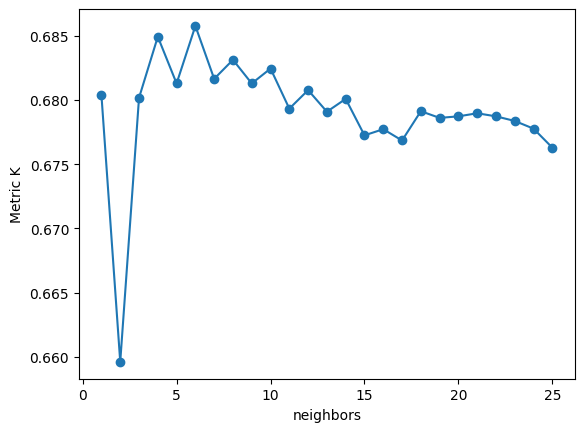

In [63]:
metric_k=[]
neighbors=np.arange(1,26)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  classifier.fit(X_train_sc,y_train_sc)
  knn_pred_sc =classifier.predict(X_test_sc)
  accuracy=accuracy_score(y_test_sc,knn_pred_sc)
  metric_k.append(accuracy)

plt.plot(neighbors,metric_k,'o-')
plt.xlabel('neighbors')
plt.ylabel('Metric K')

In [64]:
classifier=KNeighborsClassifier(n_neighbors=6,metric='euclidean')
classifier.fit(X_train_sc,y_train_sc)
knn_pred_sc =classifier.predict(X_test_sc)

print('Accuracy:',accuracy_score(y_test_sc,knn_pred_sc))
print('Precision:',precision_score(y_test_sc,knn_pred_sc,average='weighted'))
print('recall:',recall_score(y_test_sc,knn_pred_sc,average='weighted'))
print('F1:',f1_score(y_test_sc,knn_pred_sc,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test_sc,knn_pred_sc))

Accuracy: 0.68576
Precision: 0.6914969157219253
recall: 0.68576
F1: 0.6876210643297169

Confusion Matrix:
 [[2902  214 1306]
 [ 599 4864 1850]
 [1695 2192 9378]]


**Decision Tree**

In [65]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train_sc,y_train_sc)
dt_pred_sc= dt_clf.predict(X_test_sc)

print('Accuracy:',accuracy_score(y_test_sc,dt_pred_sc))
print('Precision:',precision_score(y_test_sc,dt_pred_sc,average='weighted'))
print('recall:',recall_score(y_test_sc,dt_pred_sc,average='weighted'))
print('F1:',f1_score(y_test_sc,dt_pred_sc,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test_sc,dt_pred_sc))

Accuracy: 0.74624
Precision: 0.7460427712497172
recall: 0.74624
F1: 0.7461156620619922

Confusion Matrix:
 [[ 3037   170  1215]
 [  131  5308  1874]
 [ 1240  1714 10311]]


**Random Forest**

In [66]:
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train_sc,y_train_sc)
rf_pred_sc=rf_clf.predict(X_test_sc)

print('Accuracy:',accuracy_score(y_test_sc,rf_pred_sc))
print('Precision:',precision_score(y_test_sc,rf_pred_sc,average='weighted'))
print('recall:',recall_score(y_test_sc,rf_pred_sc,average='weighted'))
print('F1:',f1_score(y_test_sc,rf_pred_sc,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test_sc,rf_pred_sc))

Accuracy: 0.82956
Precision: 0.8301689498006687
recall: 0.82956
F1: 0.829607371312076

Confusion Matrix:
 [[ 3515    24   883]
 [   42  6242  1029]
 [  843  1440 10982]]


**SVM**

In [ ]:
sv_clf=SVC()
sv_clf.fit(X_train_sc,y_train_sc)
sv_pred_sc=sv_clf.predict(X_test_sc)

print('Accuracy:',accuracy_score(y_test_sc,sv_pred_sc))
print('Precision:',precision_score(y_test_sc,sv_pred_sc,average='weighted'))
print('recall:',recall_score(y_test_sc,sv_pred_sc,average='weighted'))
print('F1:',f1_score(y_test_sc,sv_pred_sc,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test_sc,sv_pred_sc))

**Gradient Boosting**

In [67]:
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(X_train_sc, y_train_sc)
gb_pred_sc = gradient_boosting_classifier.predict(X_test_sc)

print('Accuracy:',accuracy_score(y_test_sc,gb_pred_sc))
print('Precision:',precision_score(y_test_sc,gb_pred_sc,average='weighted'))
print('recall:',recall_score(y_test_sc,gb_pred_sc,average='weighted'))
print('F1:',f1_score(y_test_sc,gb_pred_sc,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test_sc,gb_pred_sc))

Accuracy: 0.71496
Precision: 0.7205723249064625
recall: 0.71496
F1: 0.7158565306790665

Confusion Matrix:
 [[3139   59 1224]
 [ 527 4743 2043]
 [1673 1600 9992]]


**Naive Bayes**

In [68]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_sc, y_train_sc)
nb_pred_sc  = naive_bayes_classifier.predict(X_test_sc)

print('Accuracy:',accuracy_score(y_test_sc,nb_pred_sc))
print('Precision:',precision_score(y_test_sc,nb_pred_sc,average='weighted'))
print('recall:',recall_score(y_test_sc,nb_pred_sc,average='weighted'))
print('F1:',f1_score(y_test_sc,nb_pred_sc,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test_sc,nb_pred_sc))

Accuracy: 0.6432
Precision: 0.7058816283104513
recall: 0.6432
F1: 0.6462971770756746

Confusion Matrix:
 [[3748  106  568]
 [1222 5250  841]
 [3028 3155 7082]]


In [69]:

from prettytable import PrettyTable

# Create a table
tbl = PrettyTable()

# Define column names
tbl.field_names = ["Model", "Accuracy", "Precision","Recall Score","F1 Score"]

# Add rows
tbl.add_row(["LogisticRegression",0.5456,0.5299,0.5456,0.4839])
tbl.add_row(["KNN", 0.7837,0.7957,0.78376,0.7837])
tbl.add_row(["DecisionTreeClassifier", 0.7504,0.7503,0.75048,0.7504])
tbl.add_row(["RandomForestClassifier", 0.82992,0.8306,0.82992,0.8299])
tbl.add_row(["NaiveBayes", 0.6029,0.6856,0.60292,0.6031])
tbl.add_row(["GradientBoosting",0.7149,0.72057,0.71496,0.7158 ])
tbl.add_row(["SVM",0.53452,0.52114,0.53452,0.459])



In [70]:
from prettytable import PrettyTable

# Create a table
table = PrettyTable()

# Define column names
table.field_names = ["Model", "Accuracy", "Precision","Recall Score","F1 Score"]

# Add rows
table.add_row(["LogisticRegression", 0.66048,0.66315,0.66048,0.65945])
table.add_row(["KNN",  0.68576,0.6914,0.68576,0.6876])
table.add_row(["DecisionTreeClassifier", 0.7478,0.7477,0.7478,0.7477])
table.add_row(["RandomForestClassifier", 0.83152,0.8321,0.83152,0.83159])
table.add_row(["NaiveBayes", 0.6432,0.7058,0.6432,0.64629])
table.add_row(["GradientBoosting", 0.71496,0.72057,0.71496,0.7158])
table.add_row(["SVM",0.71748,0.7233,0.71748,0.7185])



print("Model Evaluation")
print(tbl)
print('\n')

print("Model Evalution for scaled data")
print(table)

Model Evaluation
+------------------------+----------+-----------+--------------+----------+
|         Model          | Accuracy | Precision | Recall Score | F1 Score |
+------------------------+----------+-----------+--------------+----------+
|   LogisticRegression   |  0.5456  |   0.5299  |    0.5456    |  0.4839  |
|          KNN           |  0.7837  |   0.7957  |   0.78376    |  0.7837  |
| DecisionTreeClassifier |  0.7504  |   0.7503  |   0.75048    |  0.7504  |
| RandomForestClassifier | 0.82992  |   0.8306  |   0.82992    |  0.8299  |
|       NaiveBayes       |  0.6029  |   0.6856  |   0.60292    |  0.6031  |
|    GradientBoosting    |  0.7149  |  0.72057  |   0.71496    |  0.7158  |
|          SVM           | 0.53452  |  0.52114  |   0.53452    |  0.459   |
+------------------------+----------+-----------+--------------+----------+


Model Evalution for scaled data
+------------------------+----------+-----------+--------------+----------+
|         Model          | Accuracy |

**While comparing the Evaluation Metrics Random Forest Model is best.**

Decision Tree , Random Forset , Gradient Boosting and Naive Bayes are less sensitive to scaling.

###**Hyperparameter Tuning for the Random forest model**

In [ ]:
# We prepared the data
# Now performing hyperparamter tuning for the rf model

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Initialize model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

#Evaluating the model

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))




##**Check for overfitting and Underfitting**

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rf_clf.score(X_test, y_test)))

This is the sign of underfitting . That is model does not generalize well for the unseen data.

In [ ]:
# print the scores on training and test set for knn model

print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

In [ ]:
# print the scores on training and test set for decision tree model

print('Training set score: {:.4f}'.format(dt_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_clf.score(X_test, y_test)))